# Car Prices Prediction
This is a simple notebook whose objective is to help fellow data scientist to understand the dataset and also serve as a baseline approach. the notebook comprises of EDA, data cleaning, modeling and validation.

## Importation of required Libraries

In [1]:
import numpy as np
import pandas as pd
import time
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Exploratory Data Analysis (EDA) 

In [2]:
# loading in the data
data=pd.read_csv('../input/nigerian-car-prices-dataset/car_prices.csv')

In [3]:
# inspecting the data 

data.head()

,car_id,price,fuel type,gear type,Make,Model,Year of manufacture,Colour,Condition,Mileage,Engine Size,Selling Condition,Bought Condition,car,Trim,Drivetrain,Seats,Number of Cylinders,Horse Power,Registered city
0,icwAaDOmX573WiRRnLFPT237,2812500,Petrol,Automatic,Toyota,Corolla,2004,Silver,Nigerian Used,251732.0,1800.0,Registered,Registered,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ByZ3NlPy2x0arAIyrKazClUS,5000000,Petrol,Automatic,Acura,MDX,2007,Green,Foreign Used,224589.0,3700.0,Imported,Imported,SUV,NaN,NaN,NaN,NaN,NaN,NaN
2,2zG6Mh3kwyoTvWoeKHkV1oFH,7592000,Petrol,Automatic,Acura,TL,2012,White,Foreign Used,111334.0,3500.0,Imported,Imported,Sedan,SH-AWD Automatic Tech Package,All Wheel,5.0,6.0,309.0,NaN
3,7APLHOPlI93qsYK0ST4D4wB2,9880000,Petrol,Automatic,Land Rover,Range Rover,2012,Gray,Nigerian Used,72682.0,4000.0,Registered,Imported,SUV,NaN,NaN,NaN,NaN,NaN,NaN
4,zIrIDPJLd46eRQf9JFacc0e,4160000,Petrol,Automatic,Ford,Edge,2013,Gray,Nigerian Used,92118.0,3500.0,Registered,Registered,SUV,NaN,NaN,NaN,NaN,NaN,Lagos


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_id               3722 non-null   object 
 1   price                3722 non-null   int64  
 2   fuel type            3721 non-null   object 
 3   gear type            3720 non-null   object 
 4   Make                 3722 non-null   object 
 5   Model                3722 non-null   object 
 6   Year of manufacture  3722 non-null   int64  
 7   Colour               3717 non-null   object 
 8   Condition            3722 non-null   object 
 9   Mileage              3663 non-null   float64
 10  Engine Size          3661 non-null   float64
 11  Selling Condition    3722 non-null   object 
 12  Bought Condition     3722 non-null   object 
 13  car                  1767 non-null   object 
 14  Trim                 879 non-null    object 
 15  Drivetrain           838 non-null    o

In [5]:
data.describe()

,price,Year of manufacture,Mileage,Engine Size,Seats,Number of Cylinders,Horse Power
count,3.722000e+03,3722.000000,3.663000e+03,3.661000e+03,788.000000,826.000000,755.000000
mean,4.514644e+06,2008.145889,1.949841e+05,1.108062e+04,5.285533,5.157385,208.831788
std,4.297012e+06,4.205670,1.395755e+05,1.091127e+05,0.800853,1.202795,70.940925
min,5.500000e+05,1979.000000,1.000000e+00,1.800000e+02,2.000000,4.000000,83.000000
25%,2.310000e+06,2005.000000,1.173945e+05,2.000000e+03,5.000000,4.000000,158.000000
50%,3.360000e+06,2008.000000,1.762900e+05,2.500000e+03,5.000000,6.000000,203.000000
75%,5.036250e+06,2011.000000,2.453815e+05,3.500000e+03,5.000000,6.000000,268.000000
max,6.240000e+07,2022.000000,2.456318e+06,3.500000e+06,8.000000,8.000000,585.000000


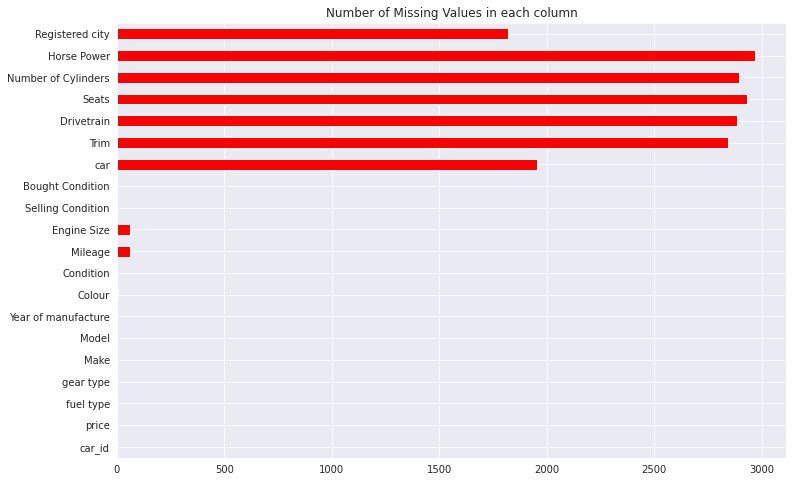

In [6]:
plt.title('Number of Missing Values in each column')
data.isnull().sum().plot(kind='barh',figsize=(12,8),color='red')
plt.show()

In [7]:
# dropping some columns with lot of missing values

missing_cols = ['car', 'Trim', 'Drivetrain', 'Seats', 'Number of Cylinders', 'Horse Power']
data.drop(missing_cols,inplace = True, axis = 1)

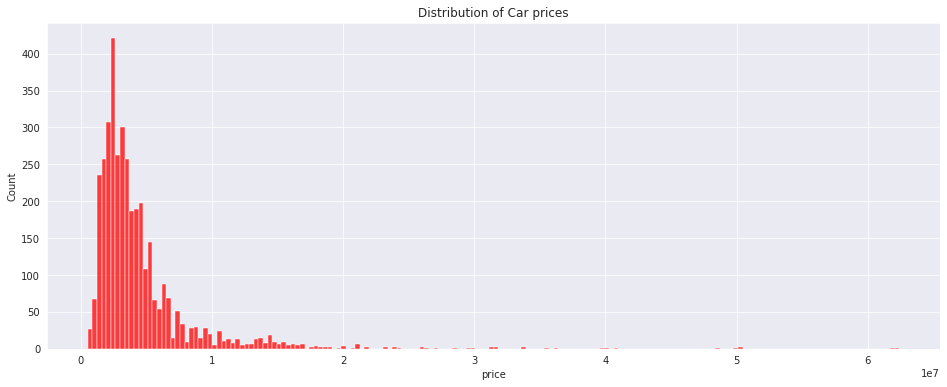

In [8]:
plt.figure(figsize=(16,6))
plt.title('Distribution of Car prices')
sns.histplot(data['price'],color='red')
plt.show()

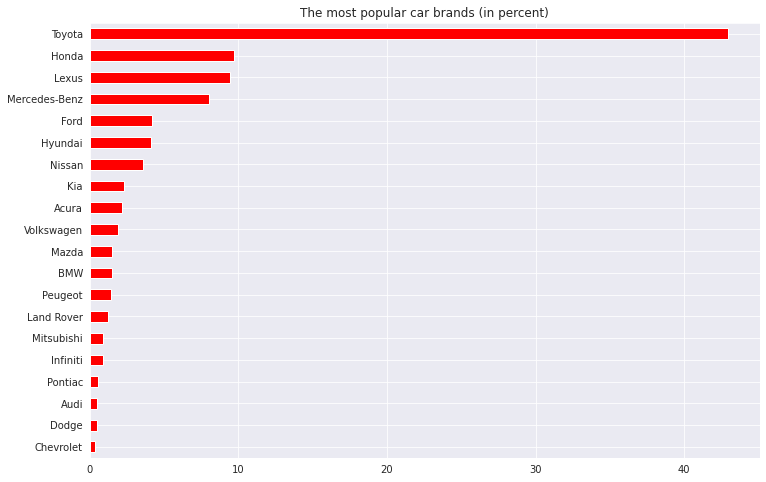

In [9]:
plt.title('The most popular car brands (in percent)')
((data['Make'].value_counts()/data.shape[0])*100).nlargest(20).sort_values().plot(kind='barh',figsize=(12,8),color='red')
plt.show()

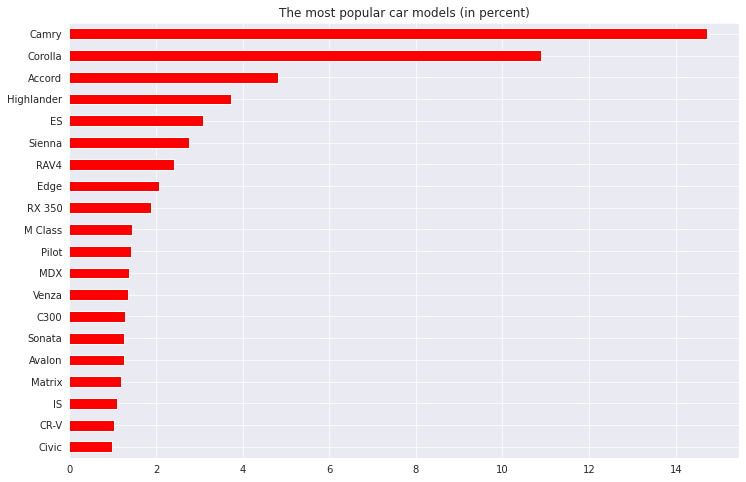

In [10]:
plt.title('The most popular car models (in percent)')
((data['Model'].value_counts()/data.shape[0])*100).nlargest(20).sort_values().plot(kind='barh',figsize=(12,8),color='red')
plt.show()

In [11]:
# handling ctaegorical features with pandas get dummies

cat_columns = ['fuel type', 'gear type', 'Make', 'Model', 'Colour', 'Condition','Selling Condition','Registered city', 'Bought Condition']
dummy_data = pd.get_dummies(data,columns=cat_columns)

In [12]:
# reoving id and price from our list of trainng features

train_cols = dummy_data.columns.difference(['car_id','price'])

In [13]:
# dropping duplicate rows
dummy_data.drop_duplicates(subset=train_cols,keep='first',inplace=True)

# Data Splitting

In [14]:
# filling all missing values with -999 
dummy_data.fillna(-999,inplace=True)

# Seperating our X(features) and y (targets)

X = dummy_data[train_cols]
y = dummy_data['price']

In [15]:
# Splitting the data into train set and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12,shuffle=True)

# Modeling and Validation

In [16]:
# Importation of our models 
from lightgbm import LGBMRegressor
import lightgbm as lgbm
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.multioutput import MultiOutputRegressor

In [17]:
lr=LinearRegression()
lr.fit(X_train,y_train)
lr_preds=lr.predict(X_test)
print('Linear regression has a mean absolute error of {:.3f}'.format(mean_absolute_error(lr_preds,y_test)))
print('Linear regression has a mean absolute percentage error of {:.3f}'.format(mean_absolute_percentage_error(y_test,lr_preds)))

Linear regression has a mean absolute error of 319408997123.800
Linear regression has a mean absolute percentage error of 48262.095


In [18]:
rf=RandomForestRegressor(max_depth=12,n_estimators=100)
rf.fit(X_train,y_train)
rf_preds=rf.predict(X_test)
print('Random Forest has a mean absolute error of {:.3f}'.format(mean_absolute_error(rf_preds,y_test)))
print('Random Forest has a mean absolute percentage error of {:.3f}'.format(mean_absolute_percentage_error(y_test,rf_preds)))

Random Forest has a mean absolute error of 1145433.559
Random Forest has a mean absolute percentage error of 0.239


In [19]:
# Function to plot feature Importance
def plot_feature_importance(importance,names,model_type,n=40):
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    fi_df=fi_df.nlargest(n, ['feature_importance'], keep='first')
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

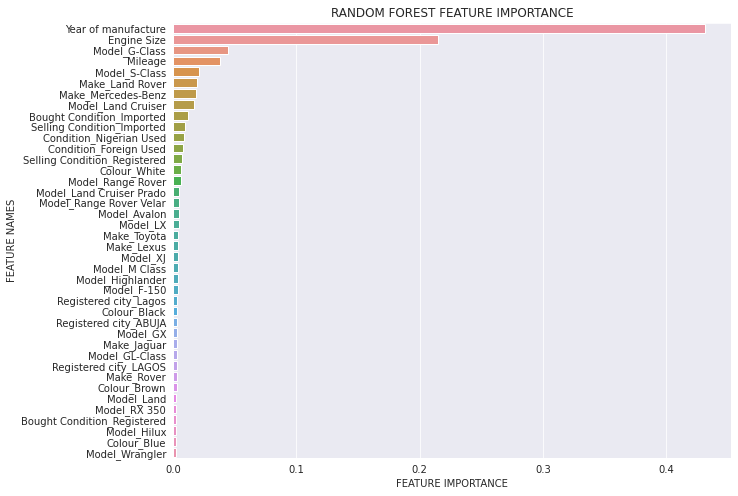

In [20]:
# plot RandomForest feature importance
plot_feature_importance(rf.feature_importances_,train_cols,'RANDOM FOREST ')

In [21]:
xgb=XGBRegressor(n_estimators=350 , max_depth=7, learning_rate=0.05, colsample_bytree=0.6, random_state=12,subsample=0.8,verbosity=0)
xgb.fit(X_train,y_train)
xgb_preds=xgb.predict(X_test)
print('Xgboost has a mean absolute error of {:.3f}'.format(mean_absolute_error(xgb_preds,y_test)))
print('Xgboost has a mean absolute percentage error of {:.3f}'.format(mean_absolute_percentage_error(y_test,xgb_preds)))

Xgboost has a mean absolute error of 1068395.175
Xgboost has a mean absolute percentage error of 0.226


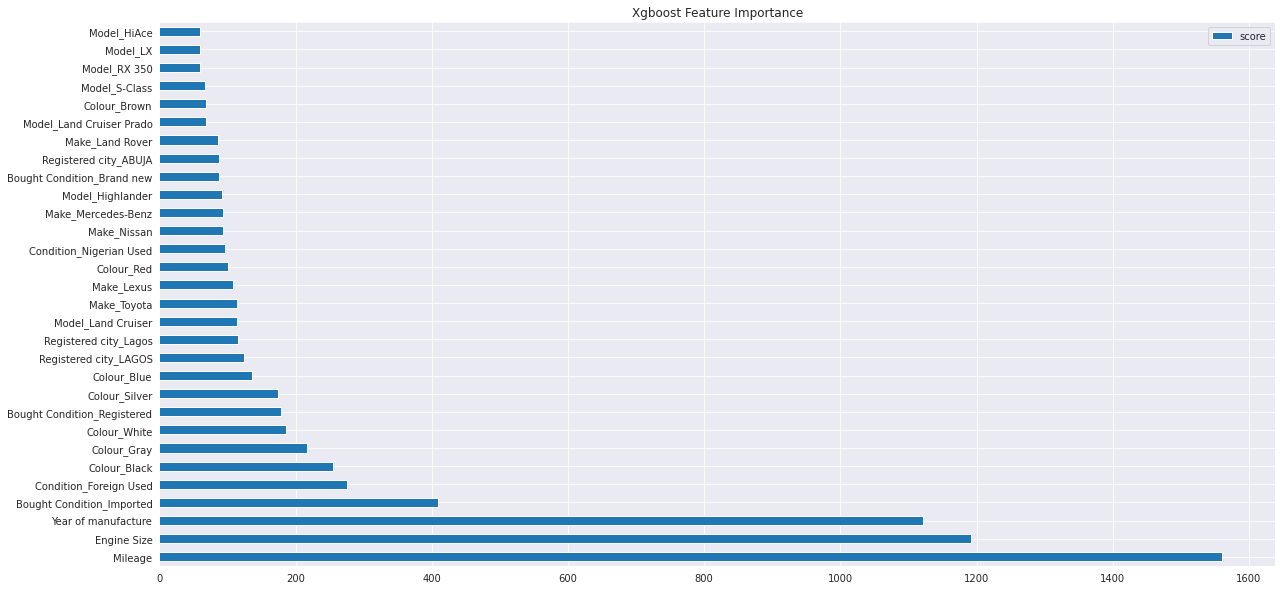

In [22]:
# Plot xgboost feature importance 

feature_important = xgb.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())
data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(30, columns="score").plot(kind='barh', figsize = (20,10))
plt.title("Xgboost Feature Importance")
plt.show()

In [23]:
cat=CatBoostRegressor( 
learning_rate= 0.08,
iterations=850,                       
depth= 7,
subsample=0.8,
bootstrap_type='Bernoulli',
colsample_bylevel=0.25,
random_seed= 12,task_type='CPU',
verbose= 0 )
cat.fit(X_train,y_train)
cat_preds=cat.predict(X_test)
print('catboost has a mean absolute error of {:.3f}'.format(mean_absolute_error(cat_preds,y_test)))
print('catboost has a mean absolute percentage error of {:.3f}'.format(mean_absolute_percentage_error(y_test,cat_preds)))

catboost has a mean absolute error of 1043668.876
catboost has a mean absolute percentage error of 0.221


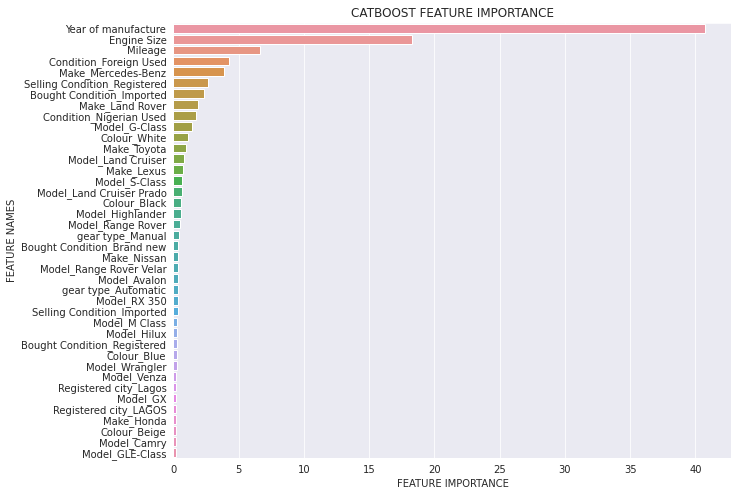

In [24]:
plot_feature_importance(cat.get_feature_importance(),train_cols,'CATBOOST ')